<a href="https://colab.research.google.com/github/victorsobottka/bse-thesis-synthetic-data/blob/main/Deepseek_Yahoo_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📈Generating Synthetic Data using Deepseek - Yahoo Finance

## **🔧 Environment Configuration**

In [ ]:
# STEP 1: Install dependencies
!pip install -q yfinance transformers accelerate
!pip -q install -U bitsandbytes

# STEP 2: Download NVIDIA stock data
import yfinance as yf
import pandas as pd


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 32.7 MB/s eta 0:00:00


# **💾 Connect to Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **📅 Dataset Download**

In [ ]:
"""
df_nvda = yf.download("NVDA", start="2020-01-01", end="2022-01-01")
df_nvda = df_nvda[["Open", "High", "Low", "Close", "Volume"]].round(2)

# Show first few rows
print("✅ Sample NVIDIA data:")
print(df_nvda.head(10))

# Step 4: Save to CSV
output_path = "/content/drive/MyDrive/Colab Notebooks/thesis/nvidia_2020_2021.csv"
df_nvda.to_csv(output_path)
print(f"💾 File saved to: {output_path}")
"""

' \ndf_nvda = yf.download("NVDA", start="2020-01-01", end="2022-01-01")\ndf_nvda = df_nvda[["Open", "High", "Low", "Close", "Volume"]].round(2)\n\n# Show first few rows\nprint("✅ Sample NVIDIA data:")\nprint(df_nvda.head(10))\n\n# Step 4: Save to CSV\noutput_path = "/content/drive/MyDrive/Colab Notebooks/thesis/nvidia_2020_2021.csv"\ndf_nvda.to_csv(output_path)\nprint(f"💾 File saved to: {output_path}")\n'

## **💬 Build the prompt**

In [ ]:
import pandas as pd

# Load the data
file_path = "/content/drive/MyDrive/Colab Notebooks/thesis/nvidia_2020_2021.csv"
df_nvda = pd.read_csv(file_path, skiprows=[1, 2], header=0)
df_nvda.columns = ["Date", "Open", "High", "Low", "Close", "Volume"]

number_of_rows = 10

# Display the first x rows
print(df_nvda.head(number_of_rows))


         Date  Open  High   Low  Close     Volume
0  2020-01-02  5.94  5.97  5.89   5.97  237536000
1  2020-01-03  5.85  5.92  5.83   5.88  205384000
2  2020-01-06  5.78  5.91  5.76   5.90  262636000
3  2020-01-07  5.93  6.02  5.88   5.97  314856000
4  2020-01-08  5.97  6.03  5.93   5.98  277108000
5  2020-01-09  6.07  6.12  6.00   6.05  255112000
6  2020-01-10  6.16  6.19  6.07   6.08  316296000
7  2020-01-13  6.17  6.30  6.14   6.27  319840000
8  2020-01-14  6.23  6.26  6.14   6.16  359088000
9  2020-01-15  6.17  6.19  6.09   6.11  263104000


In [ ]:
# STEP 3: Build prompt using first 10 rows
# example_data = df_nvda.head(number_of_rows).to_csv(index=False, header=False)
example_data = df_nvda.loc[:, ["Date", "Close"]].head(number_of_rows).to_csv(index=False, header=False)


prompt = (
    f"Here are {number_of_rows} real NVIDIA stock price rows in CSV format (Date,Close):\n\n"
    f"{example_data}\n"
    "Now generate 100 synthetic daily stock prices for NVIDIA.\n"
    "Each row must be: YYYY-MM-DD,Close\n"
    "Only output pure CSV lines.\n"
    "Format: CSV with no headers. Use YYYY-MM-DD format.\n"
    "Do NOT return code, markdown, explanation, or headers.\n"
    "This is not a coding task.\n"
    "Start the data output now:\n"
)
print("🧠 Prompt:")
print(prompt)

🧠 Prompt:
Here are 10 real NVIDIA stock price rows in CSV format (Date,Close):

2020-01-02,5.97
2020-01-03,5.88
2020-01-06,5.9
2020-01-07,5.97
2020-01-08,5.98
2020-01-09,6.05
2020-01-10,6.08
2020-01-13,6.27
2020-01-14,6.16
2020-01-15,6.11

Now generate 100 synthetic daily stock prices for NVIDIA.
Each row must be: YYYY-MM-DD,Close
Only output pure CSV lines.
Format: CSV with no headers. Use YYYY-MM-DD format.
Do NOT return code, markdown, explanation, or headers.
This is not a coding task.
Start the data output now:



#**🐋 Load DeepSeek Model**

In [ ]:
# STEP 4: Load DeepSeek 1.3B with 8-bit quantization
from transformers import AutoTokenizer, AutoModelForCausalLM

# To solve error with bits and bytes
from transformers import BitsAndBytesConfig

model_name = "deepseek-ai/deepseek-coder-1.3b-instruct"

bnb_config = BitsAndBytesConfig(load_in_8bit=True)

tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",
    quantization_config=bnb_config,
    trust_remote_code=True
)

##**🤖 Generate Synthetic Data**

In [ ]:
# STEP 5: Generate synthetic stock data
import torch

inputs = tokenizer(prompt, return_tensors="pt").to(model.device)

with torch.no_grad():
    outputs = model.generate(
        **inputs,
        max_new_tokens=4000,
        temperature=0.7,
        top_p=0.95,
        do_sample=True,
        pad_token_id=tokenizer.eos_token_id
    )

generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
generated_csv = generated_text.split("Now generate 10 new days of synthetic stock data:")[-1].strip()

print("🧠 Generated synthetic stock CSV:")
print(generated_csv)


🧠 Generated synthetic stock CSV:
Here are 10 real NVIDIA stock price rows in CSV format (Date,Close):

2020-01-02,5.97
2020-01-03,5.88
2020-01-06,5.9
2020-01-07,5.97
2020-01-08,5.98
2020-01-09,6.05
2020-01-10,6.08
2020-01-13,6.27
2020-01-14,6.16
2020-01-15,6.11

Now generate 100 synthetic daily stock prices for NVIDIA.
Each row must be: YYYY-MM-DD,Close
Only output pure CSV lines.
Format: CSV with no headers. Use YYYY-MM-DD format.
Do NOT return code, markdown, explanation, or headers.
This is not a coding task.
Start the data output now:

2020-01-02,5.97
2020-01-03,5.88
2020-01-04,5.9
2020-01-05,5.97
2020-01-06,5.98
2020-01-07,5.99
2020-01-08,6.0
2020-01-09,6.05
2020-01-10,6.06
2020-01-11,6.07
2020-01-12,6.08
2020-01-13,6.15
2020-01-14,6.16
2020-01-15,6.17
2020-01-16,6.2
2020-01-17,6.23
2020-01-18,6.27
2020-01-19,6.28
2020-01-20,6.29
2020-01-21,6.3
2020-01-22,6.31
2020-01-23,6.36
2020-01-24,6.37
2020-01-25,6.4
2020-01-26,6.42
2020-01-27,6.43
2020-01-28,6.44
2020-01-29,6.45
2020-01-30,

##**🪟 Parse output into DataFrame**

In [ ]:
from io import StringIO
import pandas as pd
import re

# 1. Extract only valid rows: starts with YYYY-MM-DD and has 2 columns
lines = []
for line in generated_csv.splitlines():
    line = line.strip()
    if re.match(r"^\d{4}-\d{2}-\d{2},", line):
        parts = line.split(",")
        if len(parts) == 2:
            try:
                float(parts[1])  # Close value
                lines.append(line)
            except ValueError:
                continue

# 2. Check number of rows captured
print(f"✅ {len(lines)} valid rows captured.")

# 3. Parse into DataFrame
cleaned_csv = "\n".join(lines)

df_synthetic = pd.read_csv(StringIO(cleaned_csv), header=None, names=["Date", "Close"])
df_synthetic["Date"] = pd.to_datetime(df_synthetic["Date"])

print("📊 Parsed synthetic DataFrame:")
df_synthetic.head()


✅ 261 valid rows captured.
📊 Parsed synthetic DataFrame:


,Date,Close
0,2020-01-02,5.97
1,2020-01-03,5.88
2,2020-01-06,5.90
3,2020-01-07,5.97
4,2020-01-08,5.98


## **📉 Visualize the results**

In [ ]:
df_real = df_nvda.copy()
df_real.columns = ["Date", "Open", "High", "Low", "Close", "Volume"]

df_real.head()

df_real["Date"] = pd.to_datetime(df_real["Date"])
df_synthetic["Date"] = pd.to_datetime(df_synthetic["Date"])


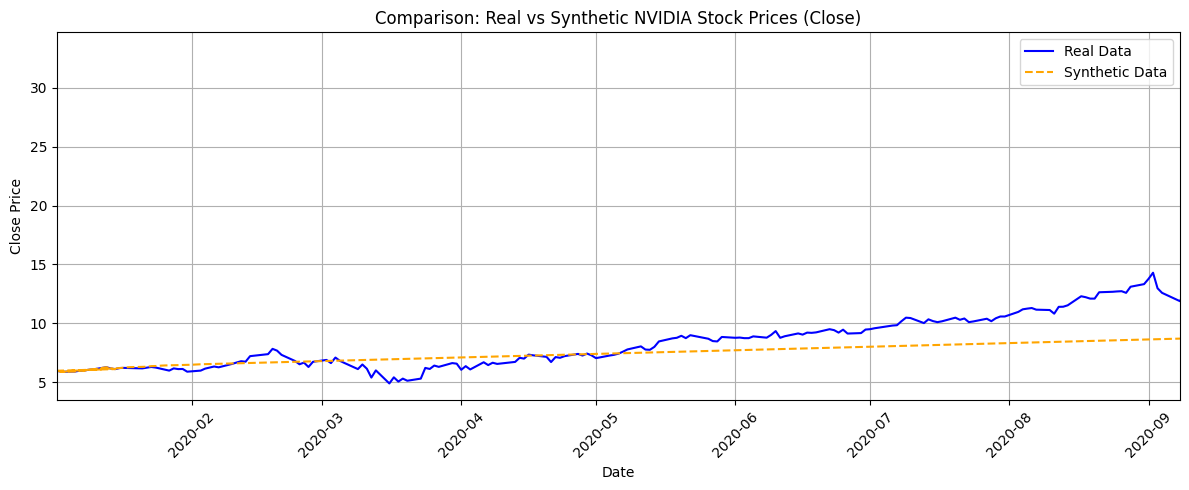

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Serie real
plt.plot(df_real["Date"], df_real["Close"], label="Real Data", color="blue")

# Serie sintética
plt.plot(df_synthetic["Date"], df_synthetic["Close"], label="Synthetic Data", color="orange", linestyle="--")

plt.title("Comparison: Real vs Synthetic NVIDIA Stock Prices (Close)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.xlim(df_real["Date"].min(), df_synthetic["Date"].max())

plt.tight_layout()
plt.show()

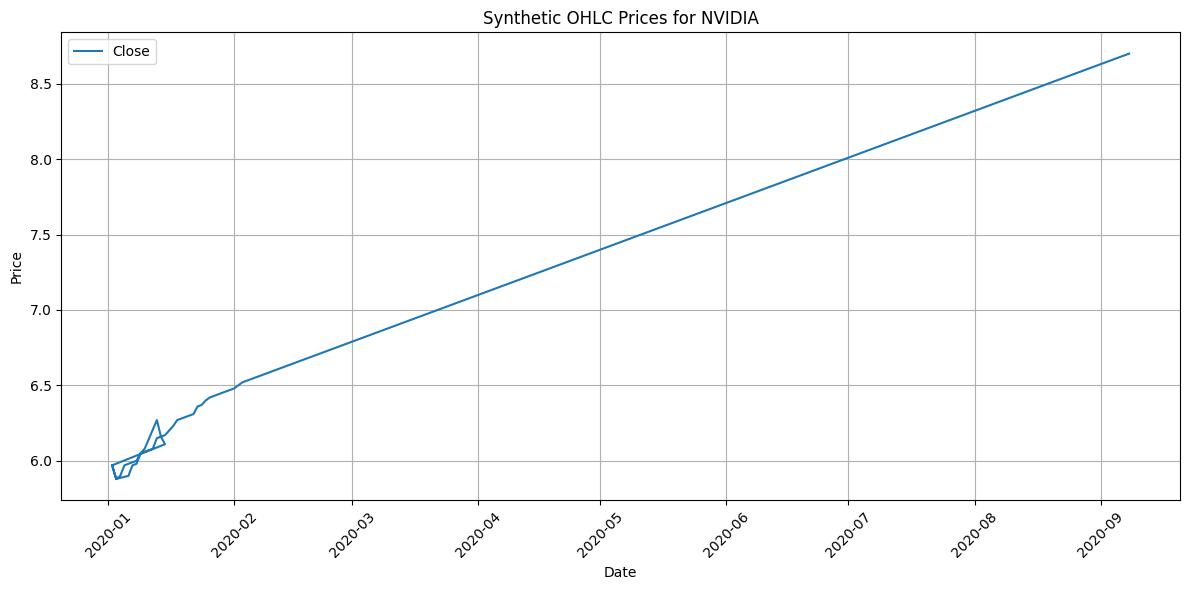

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for col in ["Close"]:
    plt.plot(df_synthetic["Date"], df_synthetic[col], label=col)

plt.title("Synthetic OHLC Prices for NVIDIA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
